In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser

# Soal 1 - Profesi

In [72]:
dfprofesi = pd.read_csv('profesi.csv', delimiter='|')

#### 1. Ada berapa jenis profesi yang ada dalam dataset tersebut? Sebutkan!

In [16]:
print(dfprofesi['occupation'].nunique())
print(dfprofesi['occupation'].unique())

21
['technician' 'other' 'writer' 'executive' 'administrator' 'student'
 'lawyer' 'educator' 'scientist' 'entertainment' 'programmer' 'librarian'
 'homemaker' 'artist' 'engineer' 'marketing' 'none' 'healthcare' 'retired'
 'salesman' 'doctor']


#### 2. Buatlah sebuah dataframe yang menunjukkan data usia maksimal, minimal & rata-ratanya, kemudian dikelompokkan berdasarkan profesi & gender!

In [71]:
dfprofesi2 = dfprofesi.groupby(['occupation','gender']).describe()

In [36]:
dfprofesi2desc = dfprofesi2['age'][['max', 'min', 'mean']]
dfprofesi2desc.rename(columns={'max':'max_usia', 'min':'min_usia', 'mean':'rerata_usia'}, inplace = True)
dfprofesi2desc.head(11)

max_usia  min_usia  rerata_usia
occupation    gender                                 
administrator F           62.0      22.0    40.638889
              M           70.0      21.0    37.162791
artist        F           48.0      19.0    30.307692
              M           45.0      20.0    32.333333
doctor        M           64.0      28.0    43.571429
educator      F           51.0      23.0    39.115385
              M           63.0      25.0    43.101449
engineer      F           36.0      23.0    29.500000
              M           70.0      22.0    36.600000
entertainment F           38.0      24.0    31.000000
              M           50.0      15.0    29.000000

#### 4. Buatlah sebuah dataframe yang menunjukkan persentase pria & wanita tiap profesi!

In [65]:
dfprofesi3 = (pd.crosstab(dfprofesi['occupation'], dfprofesi['gender'], normalize = "index")*100).reset_index()
dfprofesi3.rename(columns={'occupation':'', 'F':'%female', 'M':'%male'}, inplace = True)
dfprofesi3.head(10).style.hide_index()

,%female,%male
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,0.000000,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714
lawyer,16.666667,83.333333


# Soal 2 - Harga Historis Saham Provider Telco Indonesia

In [68]:
dfXL = pd.read_csv('EXCL.JK.csv')
dfsmartfren = pd.read_csv('FREN.JK.csv')
dfindosat = pd.read_csv('ISAT.JK.csv')
dftelkomsel = pd.read_csv('TLKM.JK.csv') 

In [115]:
dfXL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-18,2580.0,2720.0,2570.0,2700.0,2700.0,21103300
1,2019-03-19,2700.0,2730.0,2610.0,2650.0,2650.0,10211800
2,2019-03-20,2650.0,2720.0,2610.0,2700.0,2700.0,13744500
3,2019-03-21,2730.0,2760.0,2670.0,2680.0,2680.0,10669000
4,2019-03-22,2700.0,2720.0,2650.0,2660.0,2660.0,2572000
...,...,...,...,...,...,...,...
60,2019-06-10,2950.0,3020.0,2910.0,2940.0,2940.0,14450100
61,2019-06-11,2980.0,3000.0,2920.0,2940.0,2940.0,5801400
62,2019-06-12,2980.0,2980.0,2860.0,2900.0,2900.0,6123100
63,2019-06-13,2850.0,2870.0,2810.0,2860.0,2860.0,8567800


#### 1. Buatlah sebuah file python maupun jupyter notebook .ipynb yang mengakses data dari ke-4 file .csv tersebut, kemudian tampilkan data plot harga penutupan (close) harian seluruh data yang ada. Output yang diharapkan berupa grafik garis yang menampilkan harga penutupan (close) harian dari ke-4 perusahaan telco selama 3 bulan terakhir:

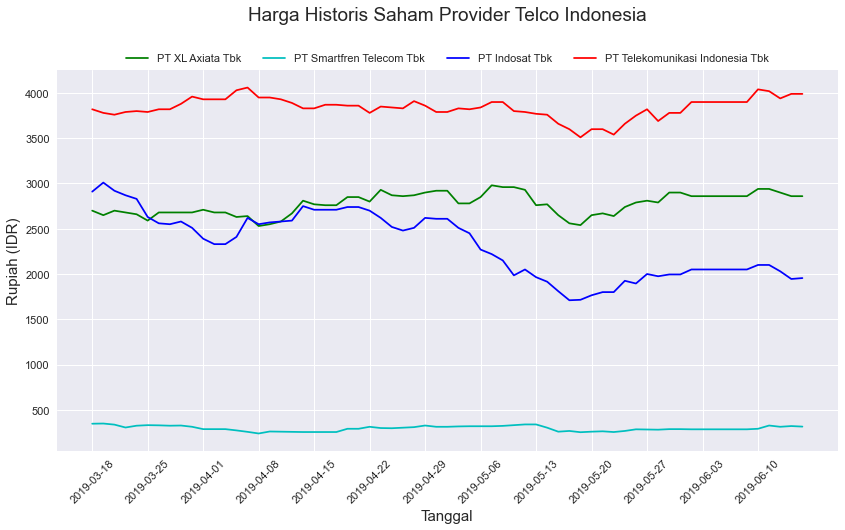

In [121]:
plt.figure(figsize=(14, 7))
plt.style.use('seaborn')
plt.plot(dfXL['Date'], dfXL['Close'], color='g', label='PT XL Axiata Tbk')
plt.plot(dfsmartfren['Date'], dfsmartfren['Close'], color='c', label='PT Smartfren Telecom Tbk')
plt.plot(dfindosat['Date'], dfindosat['Close'], color='b', label='PT Indosat Tbk')
plt.plot(dftelkomsel['Date'], dftelkomsel['Close'], color='r', label='PT Telekomunikasi Indonesia Tbk')

plt.xticks(dfXL['Date'][0::5], size=11, rotation=45)
plt.yticks(size=11)

plt.title('Harga Historis Saham Provider Telco Indonesia', size=19, pad=50)
plt.xlabel('Tanggal', size=15)
plt.ylabel('Rupiah (IDR)', size=15)

plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.07), ncol=4, fontsize=11)

plt.savefig('Harga_Historis.png')
plt.show()

#### 2. Tampilkan data plot harga penutupan (close) harian selama bulan April 2019. Output yang diharapkan berupa grafik garis yang menampilkan harga penutupan (close) harian dari ke-4 perusahaan telco selama bulan April 2019:

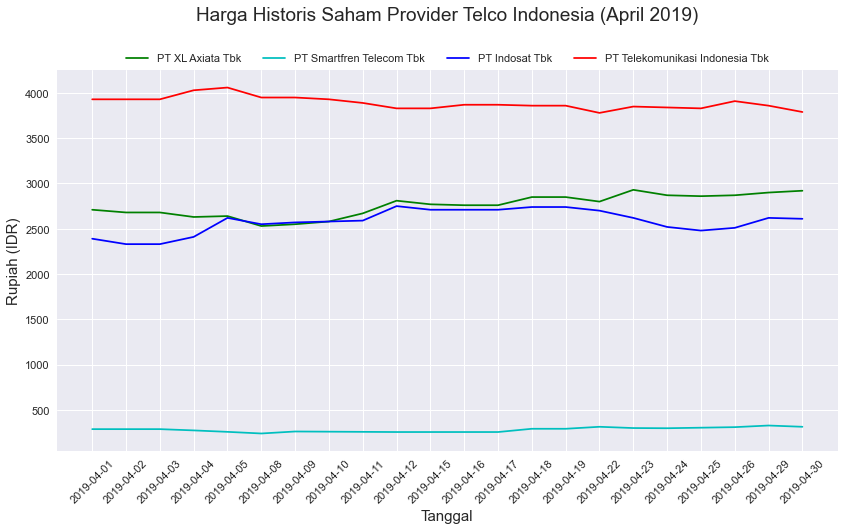

In [118]:
# Creating line plot for closing price in the last 3 months
plt.figure(figsize=(14, 7))
plt.style.use('seaborn')
XL = dfXL['Date'].str.contains("-04-")
smartfren = dfsmartfren['Date'].str.contains("-04-")
indosat = dfindosat['Date'].str.contains("-04-")
telkomsel = dftelkomsel['Date'].str.contains("-04-")
plt.plot(dfXL['Date'][XL], dfXL['Close'][XL], color='g', label='PT XL Axiata Tbk')
plt.plot(dfsmartfren['Date'][smartfren], dfsmartfren['Close'][smartfren], color='c', label='PT Smartfren Telecom Tbk')
plt.plot(dfindosat['Date'][indosat], dfindosat['Close'][indosat], color='b', label='PT Indosat Tbk')
plt.plot(dftelkomsel['Date'][telkomsel], dftelkomsel['Close'][telkomsel], color='r', label='PT Telekomunikasi Indonesia Tbk')

plt.xticks(size=11, rotation=45)
plt.yticks(size=11)

plt.title('Harga Historis Saham Provider Telco Indonesia (April 2019)', size=19, pad=50)
plt.xlabel('Tanggal', size=15)
plt.ylabel('Rupiah (IDR)', size=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.07), ncol=4, fontsize=11)

plt.savefig('Harga_Historis_April.png')
plt.show()

# Soal 3 - World Happiness

## Problem Definition

In this EDA, I want to explore about how a country has the highest happiness index score and what indicator have the most and least influent.

## EDA Goals

1. Find the highest and lowest value of each indicator
2. Find the correlation between overall rank of country happiness and each indicator
3. Find which indicator is the most and is the least influential to score

In [145]:
#Import csv file
df2019 = pd.read_csv('2019.csv', index_col= 'Overall rank')
df2019

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [146]:
#check nan value
df2019.isna().sum()

Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [172]:
# df2019.groupby(['Country or region']).describe()

In [169]:
df2019desc = df2019.drop(['Score'], axis = 1)
df2019desc.describe()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### 1. Find the highest and lowest value of each indicator

In [163]:
df2019.sort_values('GDP per capita', ascending=False)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167
14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316
34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182
51,Kuwait,6.021,1.500,1.319,0.808,0.493,0.142,0.097
...,...,...,...,...,...,...,...,...
127,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.212,0.053
141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033
145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180


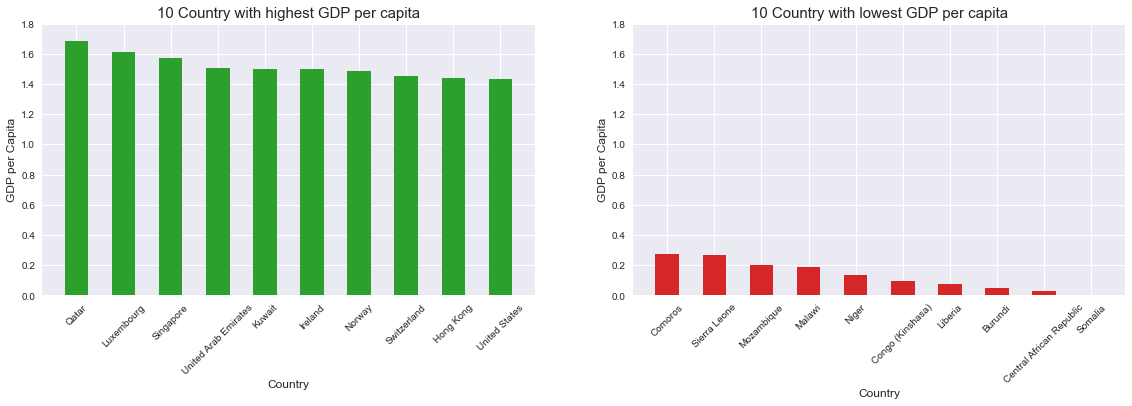

In [197]:
dfgdphead = df2019.sort_values('GDP per capita', ascending=False).head(10)
dfgdptail = df2019.sort_values('GDP per capita', ascending=False).tail(10)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(30,5))

plt.subplot(131)
plt.bar(dfgdphead['Country or region'], dfgdphead['GDP per capita'], width=.5,
                color=['tab:green'])
plt.title('10 Country with highest GDP per capita', fontsize=15)
plt.ylabel('GDP per Capita', fontsize=12)
plt.xlabel('Country', fontsize=12)
ynumber = np.random.randint(low=0, high=3, size=100)
plt.yticks(np.arange(0, max(ynumber), 0.2), fontsize=10 )
plt.xticks(rotation=45)

plt.subplot(132)
plt.bar(dfgdptail['Country or region'], dfgdptail['GDP per capita'], width=.5,
                    color=['tab:red'])
plt.title('10 Country with lowest GDP per capita',fontsize=15)
plt.ylabel('GDP per Capita', fontsize=12)
plt.xlabel('Country', fontsize=12)
ynumber = np.random.randint(low=0, high=3, size=100)
plt.yticks(np.arange(0, max(ynumber), 0.2), fontsize=10 )
plt.xticks(rotation=45,size=10)
plt.show()

In [164]:
df2019.sort_values('Social support', ascending=False)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
...,...,...,...,...,...,...,...,...
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
102,Benin,4.883,0.393,0.437,0.397,0.349,0.175,0.082


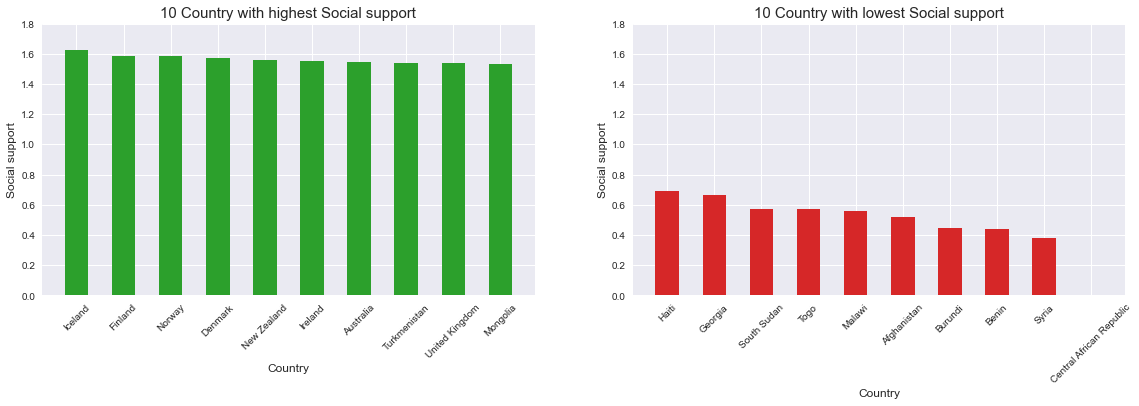

In [199]:
dfsocialhead = df2019.sort_values('Social support', ascending=False).head(10)
dfsocialtail = df2019.sort_values('Social support', ascending=False).tail(10)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(30,5))

plt.subplot(131)
plt.bar(dfsocialhead['Country or region'], dfsocialhead['Social support'], width=.5,
                color=['tab:green'])
plt.title('10 Country with highest Social support', fontsize=15)
plt.ylabel('Social support', fontsize=12)
plt.xlabel('Country', fontsize=12)
ynumber = np.random.randint(low=0, high=3, size=100)
plt.yticks(np.arange(0, max(ynumber), 0.2), fontsize=10 )
plt.xticks(rotation=45)

plt.subplot(132)
plt.bar(dfsocialtail['Country or region'], dfsocialtail['Social support'], width=.5,
                    color=['tab:red'])
plt.title('10 Country with lowest Social support',fontsize=15)
plt.ylabel('Social support', fontsize=12)
plt.xlabel('Country', fontsize=12)
ynumber = np.random.randint(low=0, high=3, size=100)
plt.yticks(np.arange(0, max(ynumber), 0.2), fontsize=10 )
plt.xticks(rotation=45,size=10)
plt.show()

In [165]:
df2019.sort_values(by='Healthy life expectancy', ascending=False)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287
58,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140
30,Spain,6.354,1.286,1.484,1.062,0.362,0.153,0.079
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
...,...,...,...,...,...,...,...,...
99,Ivory Coast,4.944,0.569,0.808,0.232,0.352,0.154,0.090
132,Chad,4.350,0.350,0.766,0.192,0.174,0.198,0.078
144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093


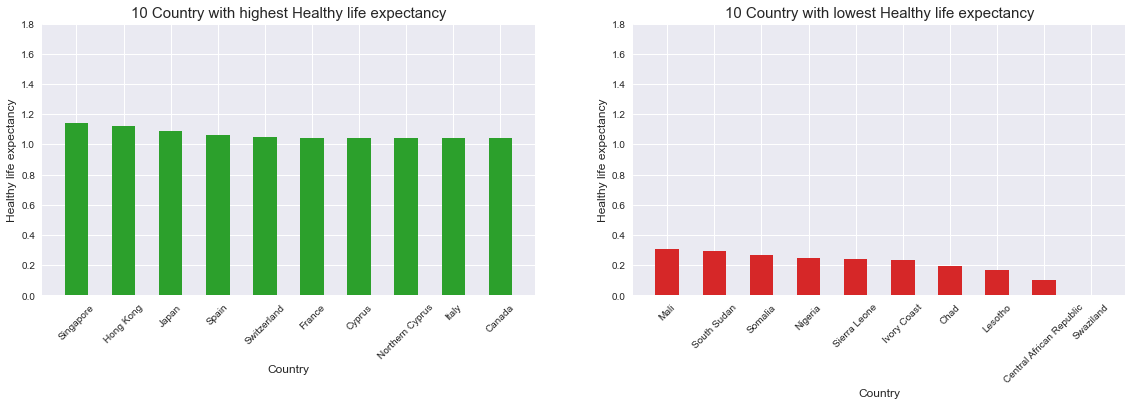

In [207]:
dfhealthhead = df2019.sort_values('Healthy life expectancy', ascending=False).head(10)
dfhealthtail = df2019.sort_values('Healthy life expectancy', ascending=False).tail(10)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(30,5))

plt.subplot(131)
plt.bar(dfhealthhead['Country or region'], dfhealthhead['Healthy life expectancy'], width=.5,
                color=['tab:green'])
plt.title('10 Country with highest Healthy life expectancy', fontsize=15)
plt.ylabel('Healthy life expectancy', fontsize=12)
plt.xlabel('Country', fontsize=12)
ynumber = np.random.randint(low=0, high=3, size=100)
plt.yticks(np.arange(0, max(ynumber), 0.2), fontsize=10 )
plt.xticks(rotation=45)

plt.subplot(132)
plt.bar(dfhealthtail['Country or region'], dfhealthtail['Healthy life expectancy'], width=.5,
                    color=['tab:red'])
plt.title('10 Country with lowest Healthy life expectancy',fontsize=15)
plt.ylabel('Healthy life expectancy', fontsize=12)
plt.xlabel('Country', fontsize=12)
ynumber = np.random.randint(low=0, high=3, size=100)
plt.yticks(np.arange(0, max(ynumber), 0.2), fontsize=10 )
plt.xticks(rotation=45,size=10)
plt.show()

In [162]:
df2019.sort_values(by='Freedom to make life choices', ascending=False)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
41,Uzbekistan,6.174,0.745,1.529,0.756,0.631,0.322,0.240
109,Cambodia,4.700,0.574,1.122,0.637,0.609,0.232,0.062
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
...,...,...,...,...,...,...,...,...
122,Mauritania,4.490,0.570,1.167,0.489,0.066,0.106,0.088
147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141


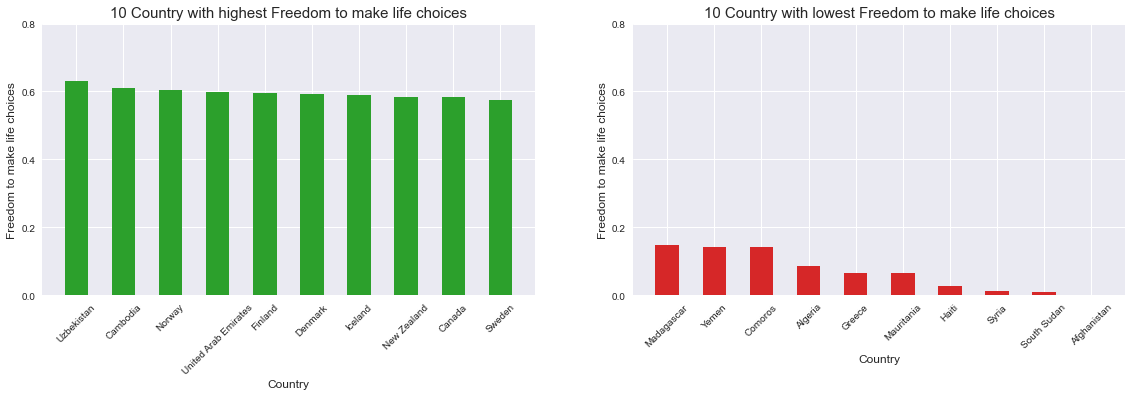

In [209]:
dffreedomhead = df2019.sort_values('Freedom to make life choices', ascending=False).head(10)
dffreedomtail = df2019.sort_values('Freedom to make life choices', ascending=False).tail(10)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(30,5))

plt.subplot(131)
plt.bar(dffreedomhead['Country or region'], dffreedomhead['Freedom to make life choices'], width=.5,
                color=['tab:green'])
plt.title('10 Country with highest Freedom to make life choices', fontsize=15)
plt.ylabel('Freedom to make life choices', fontsize=12)
plt.xlabel('Country', fontsize=12)
ynumber = np.random.randint(low=0, high=2, size=100)
plt.yticks(np.arange(0, max(ynumber), 0.2), fontsize=10 )
plt.xticks(rotation=45)

plt.subplot(132)
plt.bar(dffreedomtail['Country or region'], dffreedomtail['Freedom to make life choices'], width=.5,
                    color=['tab:red'])
plt.title('10 Country with lowest Freedom to make life choices',fontsize=15)
plt.ylabel('Freedom to make life choices', fontsize=12)
plt.xlabel('Country', fontsize=12)
ynumber = np.random.randint(low=0, high=2, size=100)
plt.yticks(np.arange(0, max(ynumber), 0.2), fontsize=10 )
plt.xticks(rotation=45,size=10)
plt.show()

In [166]:
df2019.sort_values(by='Generosity', ascending=False)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172
92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028
147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
22,Malta,6.726,1.300,1.520,0.999,0.564,0.375,0.151
121,Kenya,4.509,0.512,0.983,0.581,0.431,0.372,0.053
...,...,...,...,...,...,...,...,...
42,Lithuania,6.149,1.238,1.515,0.818,0.291,0.043,0.042
89,Morocco,5.208,0.801,0.782,0.782,0.418,0.036,0.076
90,Azerbaijan,5.208,1.043,1.147,0.769,0.351,0.035,0.182


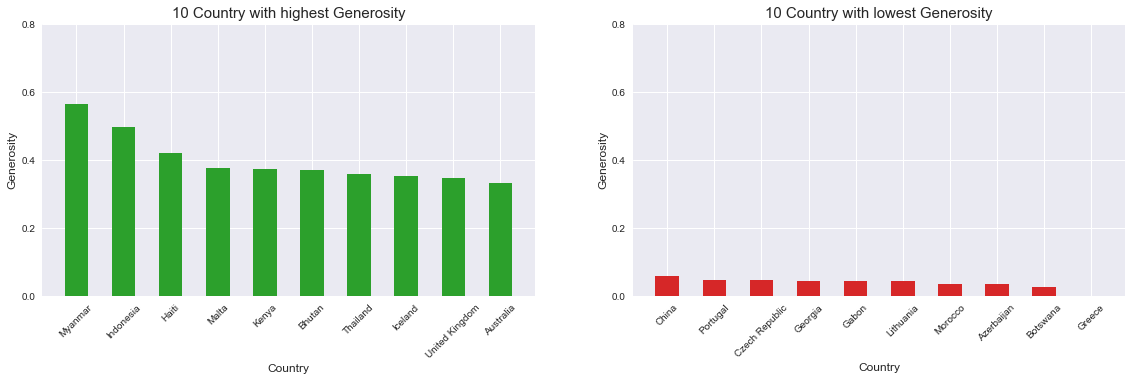

In [219]:
dfgenhead = df2019.sort_values('Generosity', ascending=False).head(10)
dfgentail = df2019.sort_values('Generosity', ascending=False).tail(10)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(30,5))

plt.subplot(131)
plt.bar(dfgenhead['Country or region'], dfgenhead['Generosity'], width=.5,
                color=['tab:green'])
plt.title('10 Country with highest Generosity', fontsize=15)
plt.ylabel('Generosity', fontsize=12)
plt.xlabel('Country', fontsize=12)
ynumber = np.random.randint(low=0, high=2, size=100)
plt.yticks(np.arange(0, max(ynumber), 0.2), fontsize=10 )
plt.xticks(rotation=45)

plt.subplot(132)
plt.bar(dfgentail['Country or region'], dfgentail['Generosity'], width=.5,
                    color=['tab:red'])
plt.title('10 Country with lowest Generosity',fontsize=15)
plt.ylabel('Generosity', fontsize=12)
plt.xlabel('Country', fontsize=12)
ynumber = np.random.randint(low=0, high=2, size=100)
plt.yticks(np.arange(0, max(ynumber), 0.2), fontsize=10 )
plt.xticks(rotation=45,size=10)
plt.show()

In [167]:
df2019.sort_values(by='Perceptions of corruption', ascending=False)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
...,...,...,...,...,...,...,...,...
78,Bosnia and Herzegovina,5.386,0.945,1.212,0.845,0.212,0.263,0.006
46,Kosovo,6.100,0.882,1.232,0.758,0.489,0.262,0.006
48,Romania,6.070,1.162,1.232,0.825,0.462,0.083,0.005


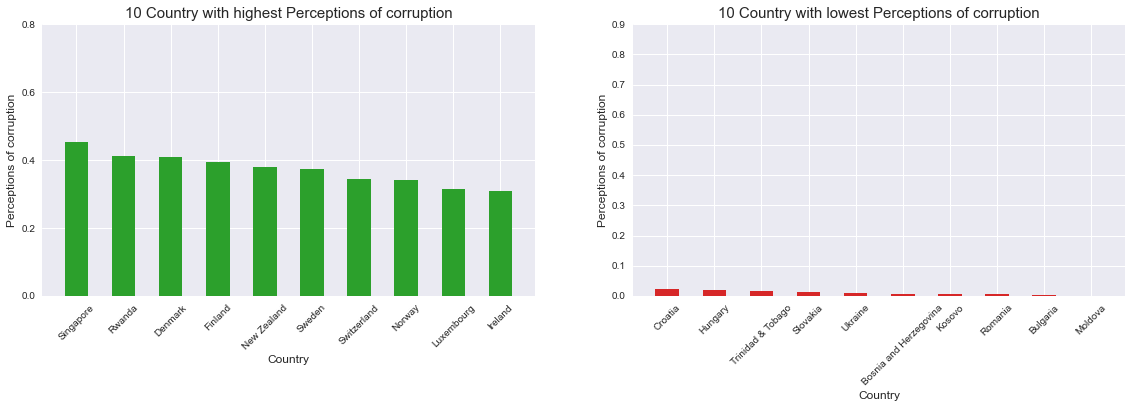

In [218]:
dfcorrhead = df2019.sort_values('Perceptions of corruption', ascending=False).head(10)
dfcorrtail = df2019.sort_values('Perceptions of corruption', ascending=False).tail(10)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(30,5))

plt.subplot(131)
plt.bar(dfcorrhead['Country or region'], dfcorrhead['Perceptions of corruption'], width=.5,
                color=['tab:green'])
plt.title('10 Country with highest Perceptions of corruption', fontsize=15)
plt.ylabel('Perceptions of corruption', fontsize=12)
plt.xlabel('Country', fontsize=12)
ynumber = np.random.randint(low=0, high=2, size=10)
plt.yticks(np.arange(0, max(ynumber), 0.2), fontsize=10 )
plt.xticks(rotation=45)

plt.subplot(132)
plt.bar(dfcorrtail['Country or region'], dfcorrtail['Perceptions of corruption'], width=.5,
                    color=['tab:red'])
plt.title('10 Country with lowest Perceptions of corruption',fontsize=15)
plt.ylabel('Perceptions of corruption', fontsize=12)
plt.xlabel('Country', fontsize=12)
ynumber = np.random.randint(low=0, high=2, size=10)
plt.yticks(np.arange(0, max(ynumber), 0.1), fontsize=10 )
plt.xticks(rotation=45,size=10)
plt.show()

Results:
- GDP per capita -> Highest: Qatar (1.684), Lowest: Somalia (0.000) | mean: 0.905147					
- Social support -> Highest: Iceland (1.624), Lowest: Central African Republic (0.000) | mean: 1.208814
- Healthy life expectancy -> Highest: Singapore (1.141), Lowest: Swaziland (0.000) | mean: 0.725244
- Freedom to make life choices -> Highest: Uzbekistan (0.322), Lowest: Afghanistan (0.158) | mean: 0.392571
- Generosity -> Highest: Myanmar (0.566) , Lowest: Greece (0.000) | mean: 0.184846
- Perceptions of corruption -> Highest: Singapore (0.453), Moldova (0.000) | mean: 0.110603 

### 2. Find the correlation between overall rank of country happiness and each indicator

In [159]:
df2019.cov()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.239036,0.352052,0.258788,0.210189,0.090394,0.008040,0.040579
GDP per capita,0.352052,0.158714,0.089981,0.080588,0.021640,-0.003023,0.011258
Social support,0.258788,0.089981,0.089515,0.052086,0.019178,-0.001372,0.005145
Healthy life expectancy,0.210189,0.080588,0.052086,0.058624,0.013544,-0.000681,0.006759
Freedom to make life choices,0.090394,0.021640,0.019178,0.013544,0.020532,0.003682,0.005945
Generosity,0.008040,-0.003023,-0.001372,-0.000681,0.003682,0.009073,0.002941
Perceptions of corruption,0.040579,0.011258,0.005145,0.006759,0.005945,0.002941,0.008937


In [170]:
df2019.corr(method = 'pearson')

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


Almost all indicators have positive relation with each other, except 'Generosity' with 'GDP per capita' (-0.079662), 'Social Support' (-0.048126), and 'Healthy life expectancy' (-0.029511). 

Strongest positive relation can be found between 'GDP per capita' and 'Healthy life' expectancy with 0.835462, while lowest positive relation can be found between 'Perceptions of corruption' and 'Social support' with 0.181899

Strongest negative relation can be found between 'Generosity' with 'GDP per capita' with -0.079662, while lowest negative relation can be found between 'Generosity' and 'Healthy life expectancy' with -0.029511

### 3. Find which indicator is the most and is the least influential to Score

The most influential indicator to score is 'GDP per capita' that with a correlation of 0.793883, while the least influential indicator to score is 'Generosity' with a correlation of 0.075824

### Conclusion:
- Finland has the highest score in the happiness survey with 7.769. Even Finland doesn't have the highest value on any indicator, but almost all of its indicators has score above the average, except Generosity (0.153 with average score 0.184846)

- Sudan is the lowest rank in happiness survey with a score of 2.853, and also almost all of its indicators are below the average score, except 'Generosity' (0.202 with average score 0.184846). It's also higher than Finland's

- 'Generosity' is the least influential indicator that has lowest correlation between all indicators with -0.029511 (between 'Generosity' and 'Healthy life expectancy'), and also with a correlation 0.075824 between 'Generosity' and 'Score'